## Exercise 1

1. Write a function $𝖻𝗂𝗇𝗈𝗆𝗂𝖺𝗅(𝗑,𝗇,𝗉)$ for the binomial distribution above, depending on parameters $x,n,p$, and test it with some prespecified values. Use the function `𝖼𝗁𝗈𝗈𝗌𝖾()` for the binomial coefficient.

2. Plot two binomials with n=20, and p=0.3,0.6 respectively.

In [10]:
binomial <- function(x,size,prob){
    # x    = quantiles
    # size = number of trials
    # prob = probability of 1
    p = choose(size, x) * prob^x * (1-prob)^(size-x)
    return(p)
}

In [21]:
#test
all.equal(binomial(3,9,0.5) ,dbinom(3,9,0.5))

[1] TRUE

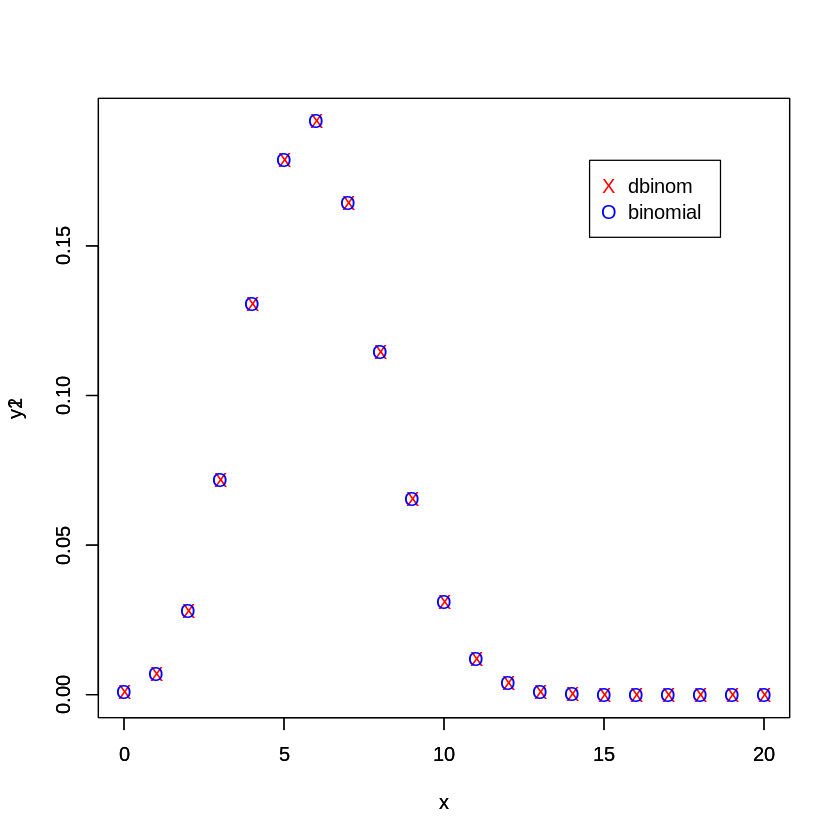

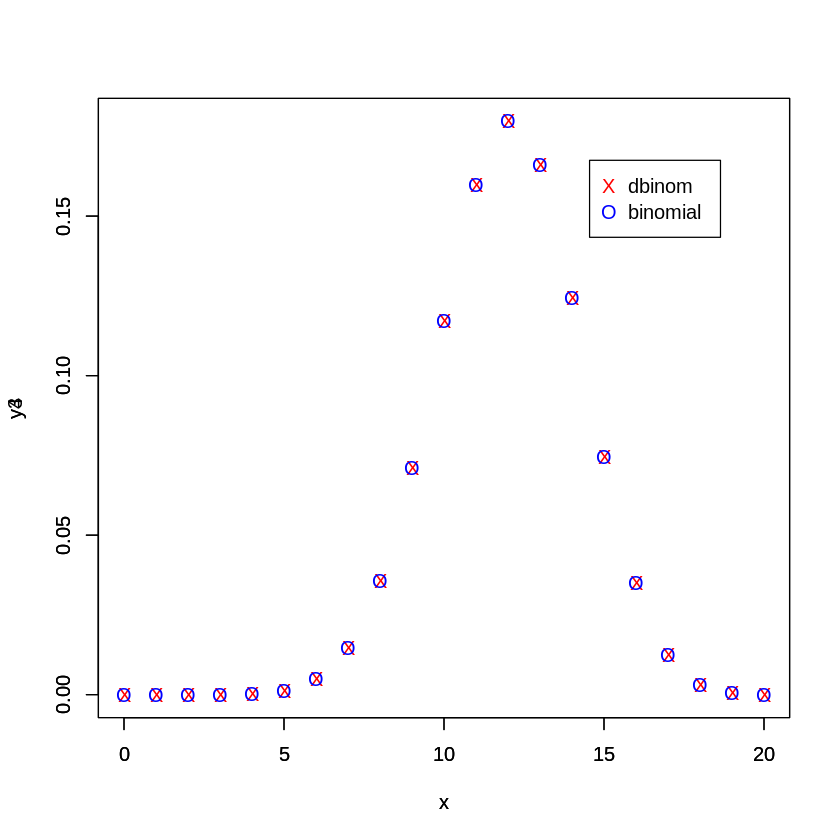

In [54]:
#plotting

x  <- seq(0,20,length=21)
y1 <- dbinom  (x,20,0.3)
y2 <- binomial(x,20,0.3)

plot(x,y1, pch="X", col="red")
par(new=TRUE)
plot(x,y2, pch="O", col="blue")
legend("topright", inset=0.1,c("dbinom","binomial"),  col=c("red","blue"), pch=c("X","O"))

y3 <- dbinom  (x,20,0.6)
y4 <- binomial(x,20,0.6)

plot(x,y3, pch="X", col="red")
par(new=TRUE)
plot(x,y4, pch="O", col="blue")
legend("topright",inset=0.1,c("dbinom","binomial"),  col=c("red","blue"), pch=c("X","O"))

## Exercise 2

Generate in 𝖱 the same output, but using `rgeom()` for generating the random variables. Hint: generate n times three geometric distribution X1,…,X3 with p=0.08, store them in a matrix and compute then the sum Y.

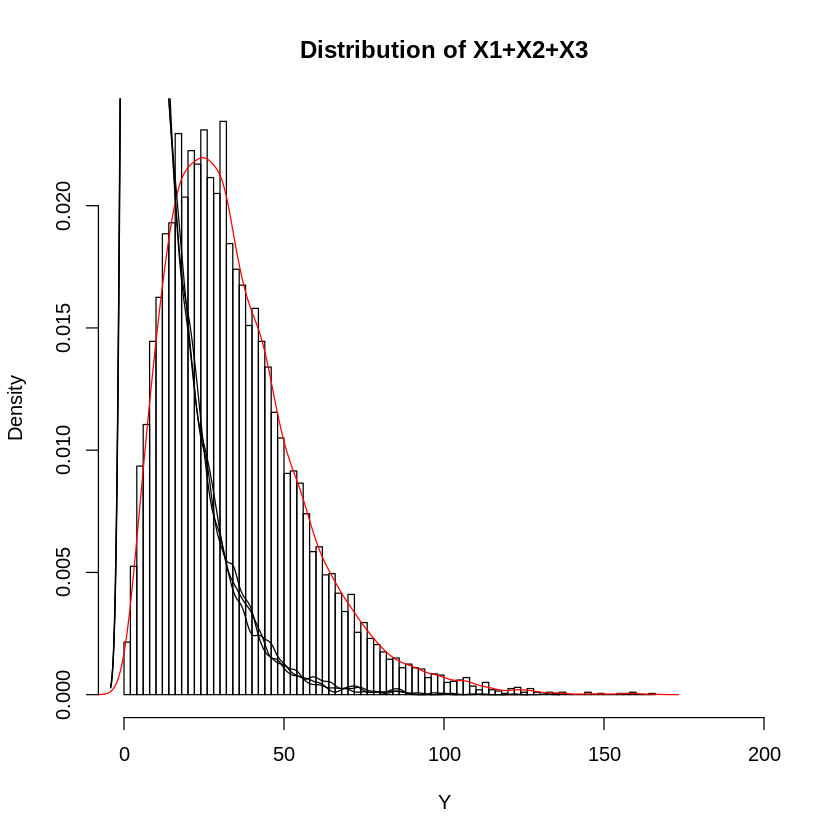

In [97]:
set.seed(42)
samples = 3
X <- list(mode="vector",length=samples)
for (i in 1:samples) {
  X[[i]] <- rgeom(10000, p = 0.08)
}

Y <- vector(length=10000)
for (i in 1:3){
    Y = Y + X[[i]]
}
d_sum = density(Y)
d_1 = density(X[[1]])
d_2 = density(X[[2]])
d_3 = density(X[[3]])

hist(Y, breaks=100, freq=FALSE, xlim=c(0,200), main="Distribution of X1+X2+X3")
lines(d_sum, col="red")
lines(d_1)
lines(d_2)
lines(d_3)

## Exercise 3
Show in 𝖱, also graphically, that Gamma(n/2,1/2) coincides with a χ2n.



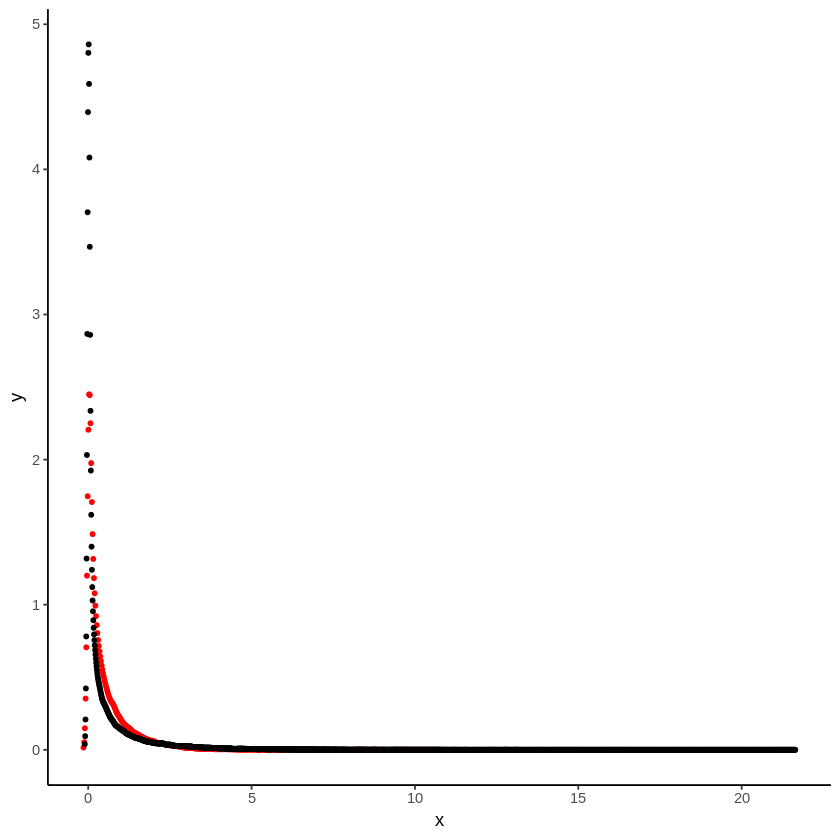

In [151]:
n = 100000

y1 = rgamma (n/2, 0.5)
den1 = density(y1, n=2000)
dat1 = data.frame(x=den$x, y=den$y)

y2= rchisq(n,df=0.5)
den2= density(y2, n=2000)
dat2= data.frame(x=den2$x, y=den2$y)

library(ggplot2)
p<- ggplot()+
    geom_point(data= dat1, aes(x=x, y=y),size=1, col="red")+
    geom_point(data= dat2, aes(x=x, y=y), size=1)+
    theme_classic()

p

# red   : gamma
# black : chisquared


Find the 5% and the 95% quantiles of a Gamma(3,3).

In [150]:
qgamma(c(0.05,0.95),3,3)

[1] 0.2725638 2.0985979

## Exercise 4

Generate n=1000 values from a Beta(5,2) and compute the sample mean and the sample variance.

In [152]:
x <- rbeta(1000,5,2)

In [157]:
mean(x)

[1] 0.7175558

In [158]:
var(x)

[1] 0.02531974

## Exercise 5

Analogously, show with a simple 𝖱 function that a negative binomial distribution may be seen as a mixture between a Poisson and a Gamma. 

*"A negative binomial distribution can also arise as a mixture of Poisson distributions with mean distributed as a gamma distribution (see pgamma) with scale parameter (1 - prob)/prob and shape parameter size. (This definition allows non-integer values of size.)*

*An alternative parametrization (often used in ecology) is by the mean mu (see above), and size, the dispersion parameter, where prob = size/(size+mu). The variance is mu + mu^2/size in this parametrization. "*

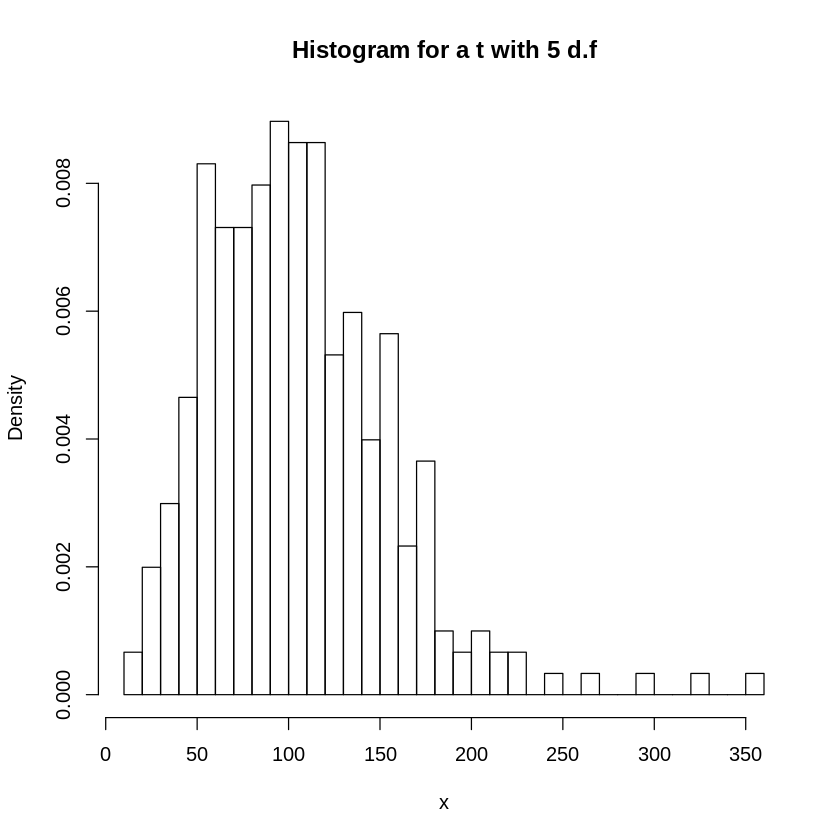

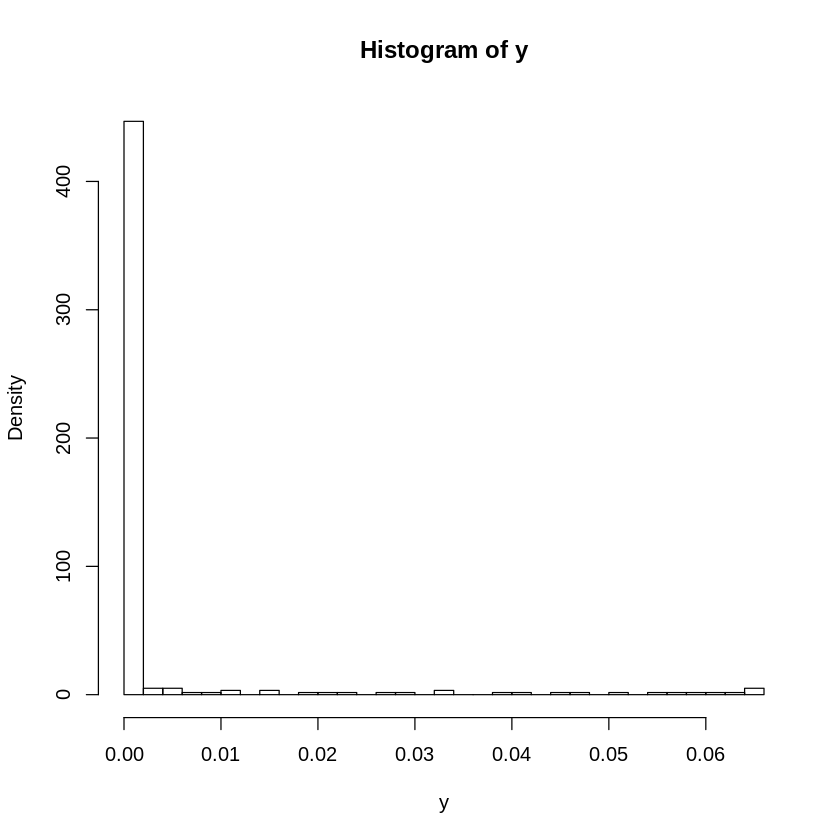

In [67]:
t_mixture <- function(n,l){
  
  Z=rpois(n,l)
  X=rgamma(n,l)
  return(X*Z)
  
}

x <- seq(0,300,by = 1)

df<-5
hist(t_mixture(x,10), probability=TRUE, breaks=40, 
  main=paste("Histogram for a t with", df, "d.f"), xlab="x")



# Create the binomial distribution.
y <- dnbinom(prob = 0.9,size = 300,x = 0:300)


# Plot the graph for this sample.
hist(y, probability = TRUE, breaks=40)

#hist(dnbinom(seq(0,300,by=1),10000,0.001), col="red", lwd=2, add=TRUE )    # fix plot of binomial

In [160]:
?rgamma


## Exercise 6 

Write your own ecdf function.

In [153]:
n = 1000
y<-rbeta(n, 3,4)

myecdf <- function (sample, resolution=0.01) {
    x = seq(0,1,resolution)  # add resolution later
    y = rep(0,length(x))
    n = length(sample)
    
    for (p in seq(0,length(y))) {
        y[p] = length(which(sample<x[p]))/ n
    }
       
    
    return (y)
}



In [162]:
p <- myecdf(y, resolution=0.01)
p



[1] 0.000 0.000 0.000 0.000 0.002 0.002 0.004 0.005 0.008 0.015 0.022 0.024
 [13] 0.030 0.035 0.043 0.050 0.061 0.071 0.077 0.091 0.099 0.109 0.119 0.129
 [25] 0.145 0.174 0.193 0.209 0.222 0.248 0.268 0.291 0.313 0.332 0.355 0.370
 [37] 0.389 0.406 0.424 0.446 0.475 0.492 0.514 0.542 0.558 0.579 0.607 0.634
 [49] 0.656 0.676 0.688 0.703 0.720 0.738 0.756 0.766 0.779 0.802 0.816 0.828
 [61] 0.842 0.856 0.872 0.885 0.897 0.905 0.919 0.931 0.938 0.946 0.954 0.958
 [73] 0.963 0.967 0.969 0.971 0.980 0.985 0.987 0.988 0.989 0.991 0.993 0.995
 [85] 0.995 0.995 0.996 0.997 0.998 0.998 0.998 0.998 0.998 0.999 1.000 1.000
 [97] 1.000 1.000 1.000 1.000 1.000

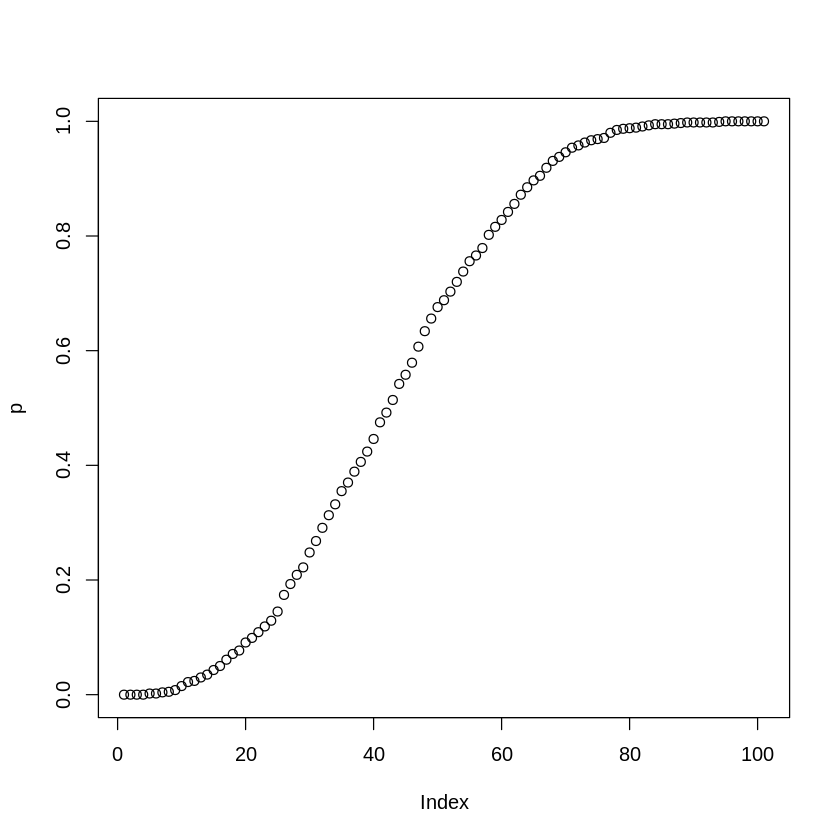

In [163]:
plot(p)

Exercise 7

Compare in 𝖱

R the assumption of normality for these samples:


y1,…,y100∼tν, with ν=5,20,100. What does it happens when the number of degrees of freedom ν increases?

y1,…,y100∼Cauchy(0,1). Do you note something weird for the extremes quantiles?

In [248]:
n <- 100

parameter = c(5,20,100)

tdist5 <- rt(n = n, df = 5)
tdist20 <- rt(n=n, df=20)
tdist100 <- rt(n=n, df=100)
tdist1000 <- rt(n=n, df=1000)






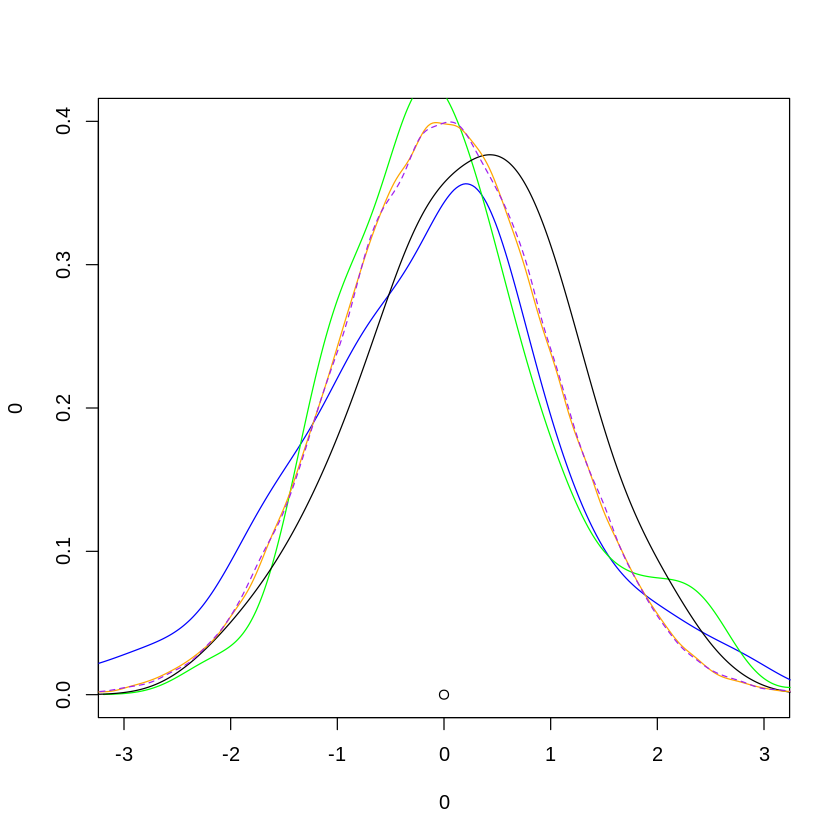

In [250]:
x <- seq(-4,4,1000)

plot(0,0, xlim=c(-3,3), ylim=c(0,.4))
lines (density(tdist5), col="blue")
lines (density (tdist20), col = "green")
lines (density (tdist100), col = "black")
lines (density (tdist1000), col = "orange")

lines (density (rnorm(n=n*1000, mean = 0, sd= 1)), col = "purple", lty=2)
#lines (density(rcauchy(0,1)), col = "cyan", lty = 5)

With growing degrees of freedom, t(high_value) ~ Normal(0,1)

## exercise 8

Write a general R function for checking the validity of the central limit theorem. 

Hint The function will consist of two parameters: clt_function <- function(n, distr), where the first one is the sampe size and the second one is the kind of distribution from which you generate. Use plots for visualizing the results.

In [327]:
clt <- function (n, distr) {
    
    pts <- 10000
    
    
    xbar = rep(0,n)
    for (i in 1:n) { 
        d <- (switch(distr,
            t =            {rt   (n = pts, df=5)},
            normal =       {rnorm(n = pts, mean=0,sd=1)},
            poisson =      {rpois(n = pts, lambda = 0.1)},
            beta=          {rbeta(n = pts, shape1 = 0.1, shape2 = 0.2)}
            )
        )
        xbar[i]=mean(d) } 
    
    return (xbar)
}

In [341]:
dist_type = "beta"  #or t, normal, poisson..
a = clt(2000, dist_type)

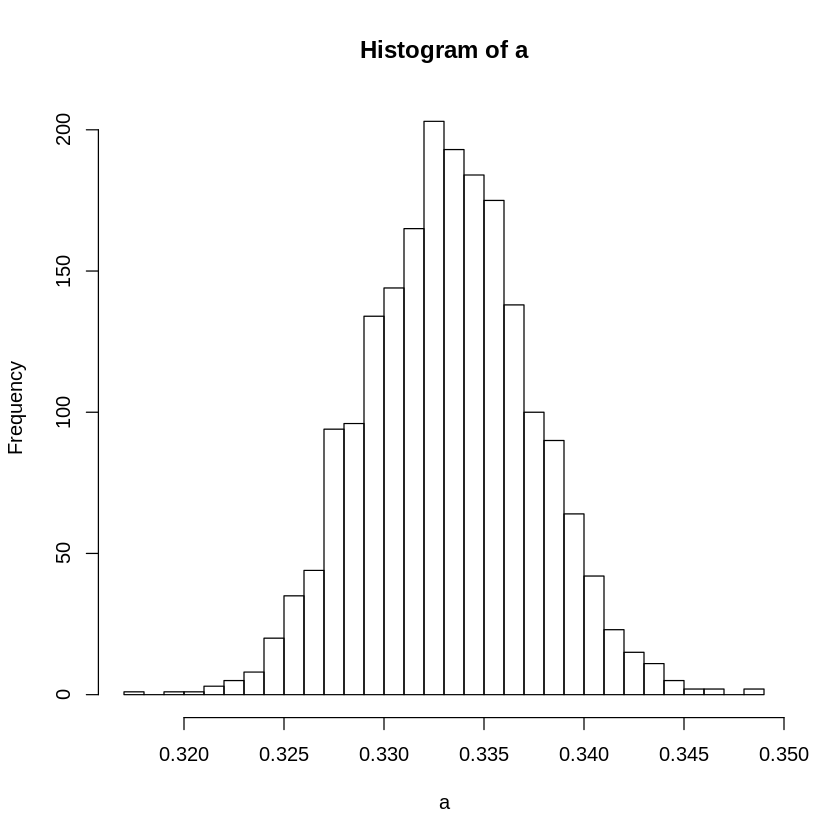

In [342]:
hist(a, breaks = 40)